# 3- Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel("adverts1-2.xlsx")

In [7]:
df = data.copy()
df.head()

,Unnamed: 0,city,district,neighborhood,room,m²,price
0,0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,4,Adana,Ceyhan,Ulus,3+1,165,9000


In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)

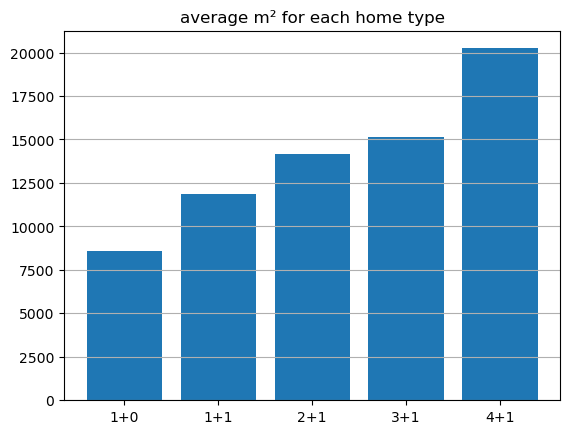

In [9]:
# average price for each home type
y = df.groupby("room")["price"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid(axis="y")
plt.title("average m² for each home type")
plt.bar(x,y)
plt.show()

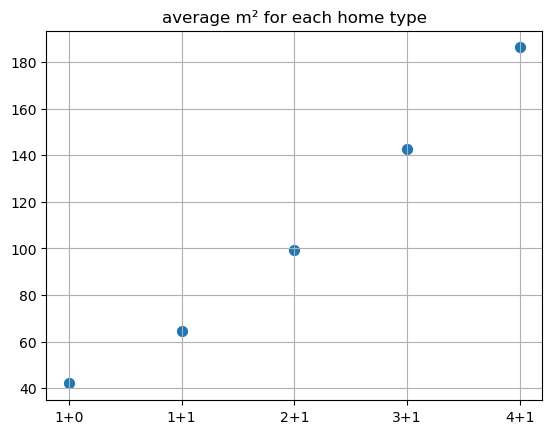

In [10]:
# average m² for each home type
y = df.groupby("room")["m²"].mean()
x = np.array(["1+0", "1+1", "2+1", "3+1", "4+1"])

plt.grid()
plt.title("average m² for each home type")
plt.scatter(x,y, s=50)
plt.show()

In [11]:
# count of home type
# the code below can also write using 'groupby' method!

unique_room_list = df["room"].unique()

twoone= [] # mean of "twoone" is "2+1" house
fourone= []
treeone= []
oneone= []
onezero= []

for i in range(len(df)):
    if unique_room_list[0] == df["room"][i]:
        twoone.append(df["room"][i])
    elif unique_room_list[1] == df["room"][i]:
        fourone.append(df["room"][i])
    elif unique_room_list[2] == df["room"][i]:
        treeone.append(df["room"][i])
    elif unique_room_list[3] == df["room"][i]:
        oneone.append(df["room"][i])
    else:
        onezero.append(df["room"][i])

print(f"count of 4+1 house: {len(fourone)}")
print(f"count of 3+1 house: {len(treeone)}")
print(f"count of 2+1 house: {len(twoone)}")
print(f"count of 1+1 house: {len(oneone)}")
print(f"count of 1+0 house: {len(onezero)}")

count of 4+1 house: 1369
count of 3+1 house: 10236
count of 2+1 house: 9778
count of 1+1 house: 5225
count of 1+0 house: 510


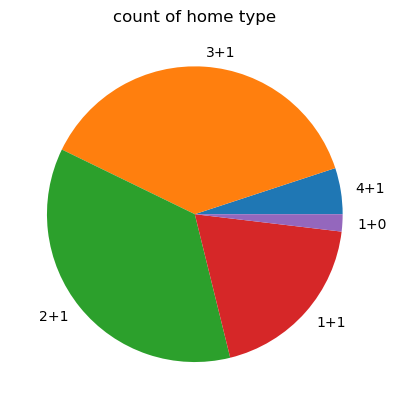

In [12]:
# count of home type
# determination x and y labels of pie chart 
x = np.array(["4+1", "3+1", "2+1", "1+1", "1+0"])
y = np.array([len(fourone), len(treeone), len(twoone), len(oneone), len(onezero)])

# create pie chart
plt.pie(y, labels=x)
plt.title("count of home type")
plt.show()

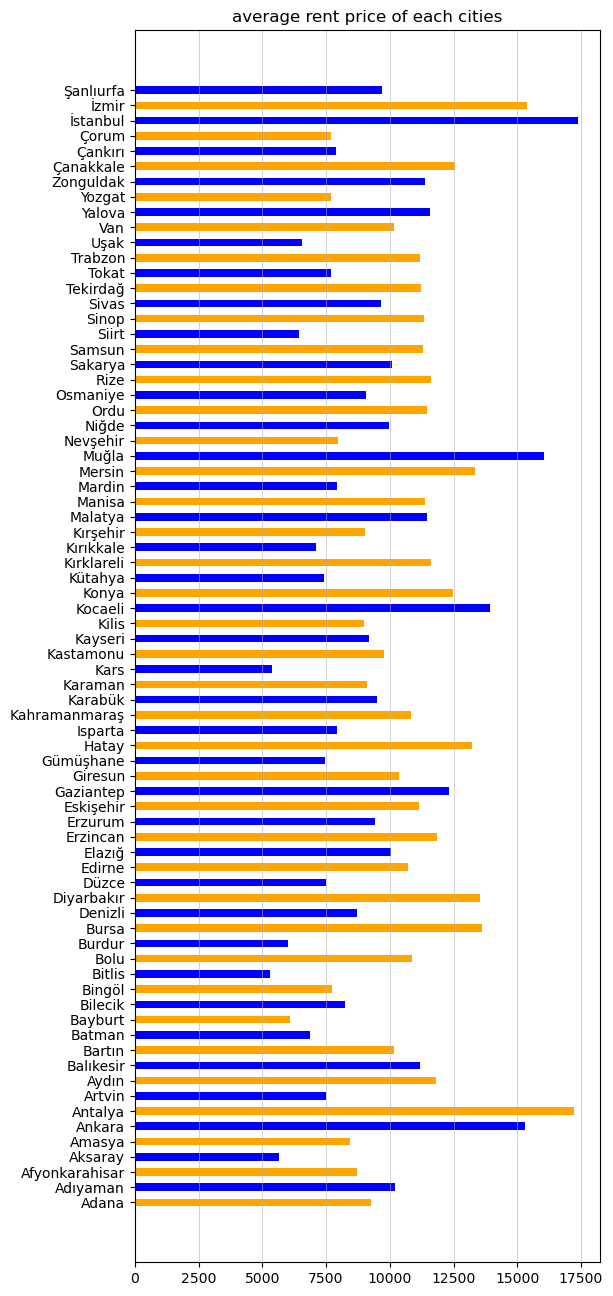

In [14]:
# Average of rental house prices for each cities

average_prices = df.groupby("city")["price"].mean()
y = average_prices.values
x = average_prices.index


plt.figure(figsize=(6, 16))
plt.grid(linewidth=0.4,  axis="x")

plt.barh(x, y,  height=0.5,  color=["orange","blue"])

plt.title("average rent price of each cities")

plt.show()

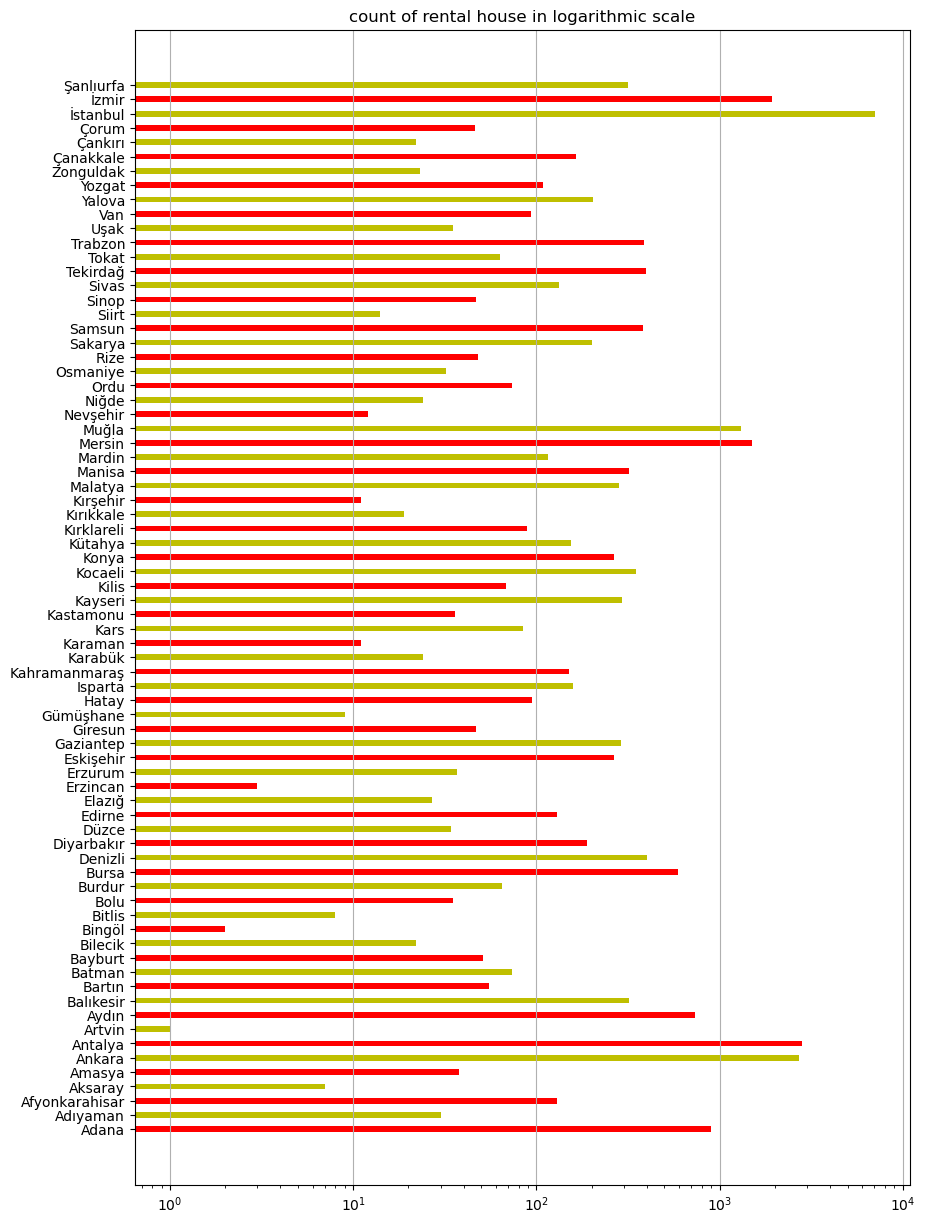

In [15]:
# count of rental house in logarithmic scale
df["constant"] = 1

y = df.groupby("city")["constant"].sum()
x = pd.DataFrame(y).index

plt.figure(figsize=(10, 15))
plt.grid(axis="x")
plt.xscale("log")

plt.barh(x, y, height=0.4,  color=["red","y"])
plt.title("count of rental house in logarithmic scale")
plt.show()